In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [11]:
path = "online_retail_II.xlsx"  # change if your path is different

df_2009_2010 = pd.read_excel(path, sheet_name="Year 2009-2010")
df_2010_2011 = pd.read_excel(path, sheet_name="Year 2010-2011")

# 2. Combine into a single DataFrame
df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df.shape

(1067371, 8)

In [14]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [18]:
import numpy as np

# 1. Standardize column names (optional but nice)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
# 2. Drop rows with missing customer_id (we can’t do RFM without a customer)
df = df.dropna(subset=['customer_id'])

# 3. Remove cancellations/returns
# - In many versions, cancellations have negative quantity or invoice starting with 'C' [web:108][web:109]
df = df[df['quantity'] > 0]

# 4. Ensure price is positive
df = df[df['price'] > 0]

# 5. Create TotalPrice (line revenue)
df['total_price'] = df['quantity'] * df['price']

df.head()
df.describe()


,quantity,invoicedate,price,customer_id,total_price
count,805549.000000,805549,805549.000000,805549.000000,805549.000000
mean,13.290522,2011-01-02 10:24:44.106814464,3.206561,15331.954970,22.026505
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-07 12:08:00,1.250000,13982.000000,4.950000
50%,5.000000,2010-12-03 15:10:00,1.950000,15271.000000,11.850000
75%,12.000000,2011-07-28 13:05:00,3.750000,16805.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,143.634088,NaN,29.199173,1696.737039,224.041928


In [20]:
df.isnull().sum()

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
total_price    0
dtype: int64

In [21]:
ref_date = df['invoicedate'].max()

rfm = (
    df
    .groupby('customer_id')
    .agg({
        'invoicedate': lambda x: (ref_date - x.max()).days,  # Recency
        'invoice': 'nunique',                                # Frequency
        'total_price': 'sum'                                 # Monetary
    })
)

rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()


,recency,frequency,monetary
customer_id,,,
12346.0,325,12,77556.46
12347.0,1,8,5633.32
12348.0,74,5,2019.40
12349.0,18,4,4428.69
12350.0,309,1,334.40


In [22]:
from sklearn.preprocessing import StandardScaler

# Use only R, F, M for clustering
rfm_features = rfm[['recency', 'frequency', 'monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


In [23]:
rfm_scaled

array([[ 0.59558355,  0.43899789,  5.05805027],
       [-0.95227909,  0.13150188,  0.17743068],
       [-0.60353226, -0.09912012, -0.06780567],
       ...,
       [ 2.19599709, -0.40661612, -0.17586406],
       [ 1.31696398, -0.32974212, -0.11686556],
       [-0.75640758,  0.05462788,  0.079013  ]], shape=(5878, 3))

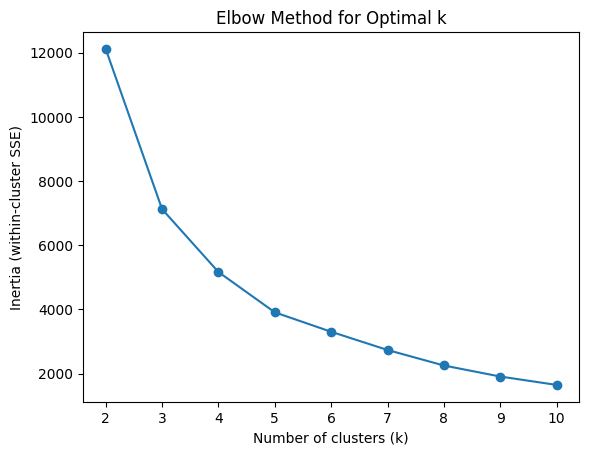

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 11)  # try K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)  # lower is better, but with diminishing returns

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()



In [26]:
best_k = 2  # change after you inspect the elbow plot

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)


In [27]:
rfm.head()


,recency,frequency,monetary,cluster
customer_id,,,,
12346.0,325,12,77556.46,0
12347.0,1,8,5633.32,0
12348.0,74,5,2019.40,0
12349.0,18,4,4428.69,0
12350.0,309,1,334.40,0


In [28]:
cluster_profile = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'recency': 'mean'
}).round(1)

cluster_profile


,recency,frequency,monetary
cluster,,,
0,201.0,5.8,2366.7
1,22.1,143.0,176557.7


In [32]:
# Example: suppose cluster 1 are high-value customers
rfm['segment'] = rfm['cluster'].map({
    0: 'Low-Value',
    1: 'High-Value'
})


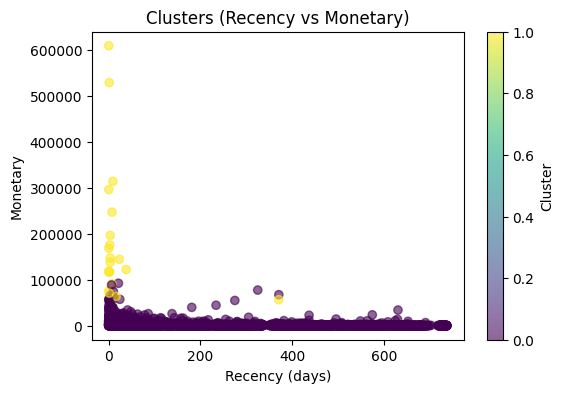

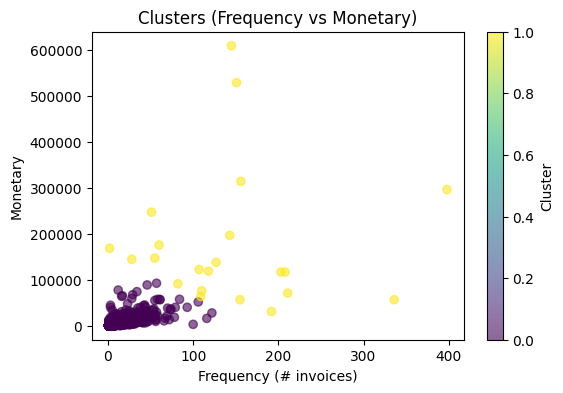

In [33]:
import matplotlib.pyplot as plt

# Recency vs Monetary
plt.figure(figsize=(6,4))
plt.scatter(rfm['recency'], rfm['monetary'],
            c=rfm['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Recency (days)')
plt.ylabel('Monetary')
plt.title('Clusters (Recency vs Monetary)')
plt.colorbar(label='Cluster')
plt.show()

# Frequency vs Monetary
plt.figure(figsize=(6,4))
plt.scatter(rfm['frequency'], rfm['monetary'],
            c=rfm['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Frequency (# invoices)')
plt.ylabel('Monetary')
plt.title('Clusters (Frequency vs Monetary)')
plt.colorbar(label='Cluster')
plt.show()


In [34]:
cluster_profile = (
    rfm
    .groupby('cluster')[['recency','frequency','monetary']]
    .mean()
    .round(1)
    .sort_values('monetary', ascending=False)
)

cluster_profile


,recency,frequency,monetary
cluster,,,
1,22.1,143.0,176557.7
0,201.0,5.8,2366.7


In [35]:
# Example: adjust based on your cluster_profile
segment_map = {
    0: 'Low-Value',
    1: 'High-Value'
}

rfm['segment'] = rfm['cluster'].map(segment_map)
rfm[['recency','frequency','monetary','cluster','segment']].head()


,recency,frequency,monetary,cluster,segment
customer_id,,,,,
12346.0,325,12,77556.46,0,Low-Value
12347.0,1,8,5633.32,0,Low-Value
12348.0,74,5,2019.40,0,Low-Value
12349.0,18,4,4428.69,0,Low-Value
12350.0,309,1,334.40,0,Low-Value


In [36]:
segment_summary = (
    rfm
    .groupby('segment')[['recency', 'frequency', 'monetary']]
    .agg(['mean', 'median', 'min', 'max'])
    .round(1)
)

segment_summary


recency                 frequency                  monetary  \
              mean median min  max      mean median min  max      mean   
segment                                                                  
High-Value    22.1    2.0   0  371     143.0  135.0   2  398  176557.7   
Low-Value    201.0   95.0   0  738       5.8    3.0   1  122    2366.7   

                                         
              median      min       max  
segment                                  
High-Value  130013.8  30861.1  608821.6  
Low-Value      891.2      3.0   92347.3

In [37]:
segment_description = {
    'High-Value': 'Recent, frequent, high spenders – VIP customers to retain and upsell.',
    'Low-Value': 'Infrequent, low-spend or older customers – targets for reactivation campaigns.'
}


In [38]:
rfm.to_csv("rfm_segments.csv", index=True)  # customer_id stays as index


In [39]:
import joblib

joblib.dump(scaler, "rfm_scaler.joblib")
joblib.dump(kmeans, "rfm_kmeans_k2.joblib")


['rfm_kmeans_k2.joblib']